# Bit By Bit ORE

Bayes Vulnerability

In [1]:
import collections
import math
from math import floor, log2
import numpy as np
import pandas as pd
from itertools import combinations # for ki_combo
from scipy.special import perm # for nPk
from sympy.utilities.iterables import partitions
from sympy.functions.combinatorial.numbers import stirling
from decimal import Decimal
import matplotlib.pyplot as plt 
pd.set_option('precision', 10)
%matplotlib inline

#### MY ALGORITHM 

_npPos(n1, n2)_: subroutine

MSB: My leftmost bit position between n1 and n2

old code: 
if (n1 <= 16 and n2 <= 16):
        w = 4
    else:
        raise ValueError("n1 or n2 too large rn.")
        
Now passing w calculated from k. Adversary knows k, knows largest possible bit length = w

In [2]:
def npPos(n1, n2, w):
    xorval = np.bitwise_xor(n1, n2)
    pos = w - floor(log2(xorval))
    return pos

In [3]:
k = 2
w = (k-1).bit_length()
print("w: ", w)
n1, n2 = 0, 1
print(npPos(n1, n2, w))

w:  1
1


Given i numbers picked from set of k, output number of unique bit patterns.

Example: k = |4| {0, 1, 2, 3} and i = 3. There are 2 different bit patterns

Algorithm:

For set of k:
    * For all ordered subsets of size i: (kCi)
        find all unique patterns (list of lists)
        count number of unique patterns
    * M_{k, i} := count

In [12]:
def unique_ki(k,i):
    ki_combo = combinations(range(k),i)
    big_pos_list = []
    w = (k-1).bit_length()
    for s in ki_combo: #for each set in ki_combo
        pos_list = []
        for n1, n2 in zip(s, s[1:]):
            n1n2_pos = npPos(n1, n2, w)
            pos_list.append(n1n2_pos)
        if pos_list not in big_pos_list:
            big_pos_list.append(pos_list)
    return len(big_pos_list)

In [5]:
k = 4 # {0-3}
i = 3
u = unique_ki(k,i)
print(u)

2


In [20]:
def bit_pattern_fork(k, i_limit):
    zero_data = np.zeros(shape=(1,i_limit)) # 1 row for 1 k
    
    i_col = []
    for i in range(i_limit):
        i_str = ""
        i_str += "i" + str(i+1) # 1 - i_limit
        i_col.append(i_str)
    
    k_row = []
    k_str = ""
    k_str += "k" + str(k)
    k_row.append(k_str)
    
    df = pd.DataFrame(zero_data, index=k_row, columns = i_col)
    df.rename_axis('k')
    
    for i in range(i_limit):
        i_str = ""
        i_str += "i" + str(i+1)
        if i > k:
            df.at[k_str, i_str] = 0.0
        else:
            print("i: ", i)
            u = unique_ki(k,i+1)
            print("u: ", u)
            df.at[k_str, i_str] = u
    return df

In [17]:
TEST = bit_pattern_fork(16, 16)
TEST

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16
k16,1.0,4.0,12.0,30.0,64.0,118.0,188.0,258.0,302.0,298.0,244.0,162.0,84.0,32.0,8.0,1.0


In [22]:
k20df = bit_pattern_fork(20, 20)
k20df

i:  0
u:  1
i:  1
u:  5
i:  2
u:  18
i:  3
u:  52
i:  4
u:  127
i:  5
u:  270
i:  6
u:  506
i:  7
u:  840
i:  8
u:  1236
i:  9
u:  1610
i:  10
u:  1850
i:  11
u:  1864
i:  12
u:  1632
i:  13
u:  1226
i:  14
u:  776
i:  15
u:  403
i:  16
u:  165
i:  17
u:  50
i:  18
u:  10
i:  19
u:  1


,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16,i17,i18,i19,i20
k20,1.0,5.0,18.0,52.0,127.0,270.0,506.0,840.0,1236.0,1610.0,1850.0,1864.0,1632.0,1226.0,776.0,403.0,165.0,50.0,10.0,1.0


In [23]:
k20df.to_csv(r'data\k20df.csv', index = None, header=True)

In [24]:
M20 = pd.read_csv(r'data\k20df.csv')

Row by row

In [4]:
def OLDpopulate_kiM(k_limit, i_limit):
    zero_data = np.zeros(shape=(k_limit,i_limit))

    i_col = []
    for i in range(i_limit):
        i_str = ""
        i_str += "i" + str(i+1) # 1 - i_limit
        i_col.append(i_str)
        
    k_row = []
    for k in range(k_limit):
        k_str = ""
        k_str += "k" + str(k+1) # 1 - k_limit
        k_row.append(k_str)
        
    df = pd.DataFrame(zero_data, index=k_row, columns = i_col)
    df.rename_axis('k')
    
    for k in range(k_limit):
        k_str = ""
        k_str += "k" + str(k+1)
        for i in range(i_limit):
            i_str = ""
            i_str += "i" + str(i+1)
            if i > k:
                df.at[k_str, i_str] = 0.0
            else:
                u = unique_ki(k+1,i+1)
                df.at[k_str, i_str] = u
    return df

In [27]:
k_limit = 16
i_limit = 16
Tdf_16x16 = OLDpopulate_kiM(k_limit, i_limit)
Tdf_16x16

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16
k1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k3,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k4,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k5,1.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k6,1.0,3.0,5.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k7,1.0,3.0,6.0,8.0,7.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k8,1.0,3.0,6.0,9.0,10.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k9,1.0,4.0,9.0,15.0,19.0,18.0,12.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k10,1.0,4.0,10.0,18.0,25.0,27.0,22.0,13.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


column by column

In [8]:
def populate_kiM(k_limit, i_limit):
    zero_data = np.zeros(shape=(k_limit,i_limit))

    i_col = []
    for i in range(i_limit):
        i_str = ""
        i_str += "i" + str(i+1) # 1 - i_limit
        i_col.append(i_str)
        
    k_row = []
    for k in range(k_limit):
        k_str = ""
        k_str += "k" + str(k+1) # 1 - k_limit
        k_row.append(k_str)
        
    df = pd.DataFrame(zero_data, index=k_row, columns = i_col)
    df.rename_axis('k')
    
    for i in range(i_limit): # going down columns is faster
        i_str = ""
        i_str += "i" + str(i+1)        
        for k in range(k_limit): # 0 to k-1. Ex: 0 to 15 when k = 16
            k_str = ""
            k_str += "k" + str(k+1)
            w = k.bit_length()
            big_pos_list = [] # resets with k TEST
            if i > k:
                continue
            else:
                ki_combo = combinations(range(k+1),i+1) 
                for s in ki_combo: #for each set in ki_combo
                    pos_list = []
                    for n1, n2 in zip(s, s[1:]):
                        n1n2_pos = npPos(n1, n2, w)
                        pos_list.append(n1n2_pos)
                    if pos_list not in big_pos_list:
                        big_pos_list.append(pos_list)
                u = len(big_pos_list)
                df.at[k_str, i_str] = u
    return df

In [9]:
k_limit = 16
i_limit = 16
df16 = populate_kiM(k_limit, i_limit)
df16

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16
k1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k3,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k4,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k5,1.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k6,1.0,3.0,5.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k7,1.0,3.0,6.0,8.0,7.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k8,1.0,3.0,6.0,9.0,10.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k9,1.0,4.0,9.0,15.0,19.0,18.0,12.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k10,1.0,4.0,10.0,18.0,25.0,27.0,22.0,13.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
k_limit = 100
k_limit = 100
df100 = populate_kiM(k_limit, i_limit)
df100

In [ ]:
df_100.to_csv(r'data\df_100.csv', index = None, header=True)

In [ ]:
M100 = pd.read_csv(r'data\df_100.csv')

__uni_ore_bbb_bayes(n, k)__ calculates calculates the posterior Bayes vulnerability for bit-by-bit Order Revealing Encryption (ORE). Only works on a uniform prior

(Equation includes df reference right now. Obvs won't stay)
$$ V_1 [C \triangleright \pi ]  =  \frac{\sum_{i=1}^{min(n, k)} \text{stirling2}(n, i)\times i! \times \text{df}_{k, i}}{\sum_{i=1}^{min(n, k)} \text{stirling2}(n, i)\times kPi}  $$

The numerator is larger than ideal ORE (more channel outputs)

The denominator is the same as ideal ORE (same number of channel inputs)

In [35]:
def uni_ore_bbb_bayes(n, k, M): # M is df matrix
    outputs = 0
    inputs = 0
    for i in range(n):
        if k < i+1:
            break
        s2 = stirling(n, i+1)
        i_str = ""
        i_str += "i" + str(i+1)
        outputs = outputs + (math.factorial(i+1) * s2 * M.at[0, i_str])
        inputs = inputs + (perm(k, i+1) * s2)
    #print("outputs: ", outputs)
    #print("inputs: ", inputs)
    return outputs / inputs

In [36]:
n = 25
k = 20
M = M20
print("bayes ", uni_ore_bbb_bayes(n, k, M))

bayes  0.0513147599421848


In [ ]:
n = 4
k = 3
print("bayes ", uni_ore_bbb_bayes(n, k, df_16x16))

In [37]:
def df_uni_ore_bbb_bayes(n_range, k, M): #M is df matrix
    n = 0
    n_list = []
    prior_list = []
    post_list = []
    for x in range(n_range):
        n = n + 1
        n_list.append(n)
        prior = pow(1/k, n)
        prior_list.append(prior)
        post = uni_ore_bbb_bayes(n, k, M) #only dif
        post_list.append(post)
    df = pd.DataFrame(
        {'n':n_list,
         'prior':prior_list,
         'posterior':post_list
        }
    )
    return df

#### For testing, ignore

In [44]:
def uni_ore_bayes(n, k): # annotated equation from ideal ORE
    outputs = 0
    inputs = 0
    for c in range(n):
        if k < c+1:
            break
        s2 = stirling(n, c+1)
        outputs = outputs + (math.factorial(c+1) * s2)
        inputs = inputs + (perm(k, c+1) * s2)
    return outputs / inputs

In [ ]:
print("Bayes for ideal: ", uni_ore_bayes(3, 3))

In [ ]:
print("bayes ", uni_ore_bbb_bayes(4, 3))

In [46]:
def df_uni_ore_idealvsBBB_bayes(n_range, k, M): #M is df matrix
    n = 0
    n_list = []
    prior_list = []
    postIdeal_list = []
    postBBB_list = []
    for x in range(n_range):
        n = n + 1
        n_list.append(n)
        prior = pow(1/k, n)
        prior_list.append(prior)
        bbb = uni_ore_bbb_bayes(n, k, M) #only dif
        postBBB_list.append(bbb)
        ideal = uni_ore_bayes(n, k)
        postIdeal_list.append(ideal)
    df = pd.DataFrame(
        {'n':n_list,
         'prior':prior_list,
         'postIdeal':postIdeal_list,
         'postBBB': postBBB_list
        }
    )
    return df

In [49]:
n_range = 25
k = 20
M = M20
df20vs = df_uni_ore_idealvsBBB_bayes(n_range, k, M)
df20vs

,n,prior,postIdeal,postBBB
0,1,5.0000000000e-02,0.0500000000000000,0.0500000000000000
1,2,2.5000000000e-03,0.00750000000000000,0.0275000000000000
2,3,1.2500000000e-04,0.00162500000000000,0.0173750000000000
3,4,6.2500000000e-06,0.000468750000000000,0.0122937500000000
4,5,3.1250000000e-07,0.000169062500000000,0.00955343750000000
5,6,1.5625000000e-08,7.31718750000000e-5,0.00803360937500000
6,7,7.8125000000e-10,3.69476562500000e-5,0.00721576484375000
7,8,3.9062500000e-11,2.13216796875000e-5,0.00684438933593750
8,9,1.9531250000e-12,1.38423066406250e-5,0.00678974455273438
9,10,9.7656250000e-14,9.98511357421875e-6,0.00698749906162109


In [38]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
font_choice = 14
plt.rcParams.update(plt.rcParamsDefault)
rc_fonts = {
    "text.usetex": True,
    "font.size": font_choice,
    'mathtext.default': 'regular',
    'axes.titlesize': font_choice,
    "axes.labelsize": font_choice,
    "legend.fontsize": font_choice,
    "xtick.labelsize": font_choice,
    "ytick.labelsize": font_choice,
    'figure.titlesize': font_choice,
    'figure.figsize': (8,5.25),
    'text.latex.preamble': [r'\usepackage{amsmath,nicefrac, sansmath}', 
                            r'\sansmath'],
    "font.family": "sans-serif",#"font.sans-serif": "computer modern",
    }
mpl.rcParams.update(rc_fonts)

In [47]:
def graph_it_vs(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'postIdeal',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="Ideal")
    plt.plot('n', 'postBBB',
             color='red',
             data=df,
             linestyle='--',
             marker='', 
             label="BBB")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 0, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('Bit By Bit vs Ideal Bayes vulnerability, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

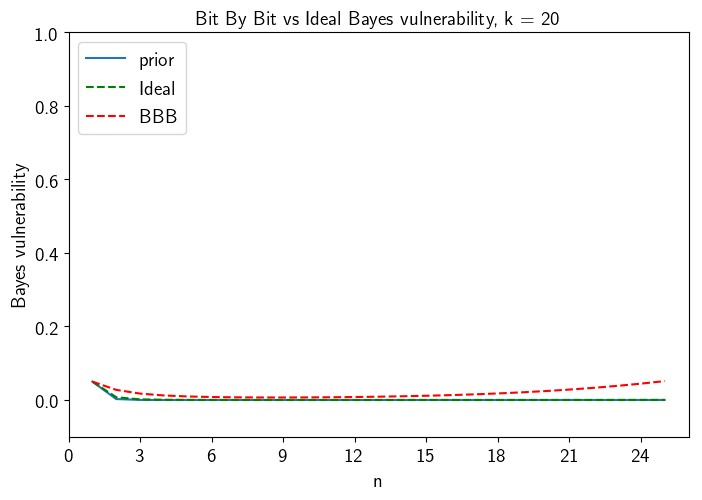

In [50]:
n_range = 25
k = 20
graph_it_vs(n_range, k, df20vs)

k = 20, n ranging from 1 - 100

In [52]:
n_range = 100
k = 20
M = M20
df20n100vs = df_uni_ore_idealvsBBB_bayes(n_range, k, M)
df20n100vs

,n,prior,postIdeal,postBBB
0,1,5.0000000000e-02,0.0500000000000000,0.0500000000000000
1,2,2.5000000000e-03,0.00750000000000000,0.0275000000000000
2,3,1.2500000000e-04,0.00162500000000000,0.0173750000000000
3,4,6.2500000000e-06,0.000468750000000000,0.0122937500000000
4,5,3.1250000000e-07,0.000169062500000000,0.00955343750000000
5,6,1.5625000000e-08,7.31718750000000e-5,0.00803360937500000
6,7,7.8125000000e-10,3.69476562500000e-5,0.00721576484375000
7,8,3.9062500000e-11,2.13216796875000e-5,0.00684438933593750
8,9,1.9531250000e-12,1.38423066406250e-5,0.00678974455273438
9,10,9.7656250000e-14,9.98511357421875e-6,0.00698749906162109


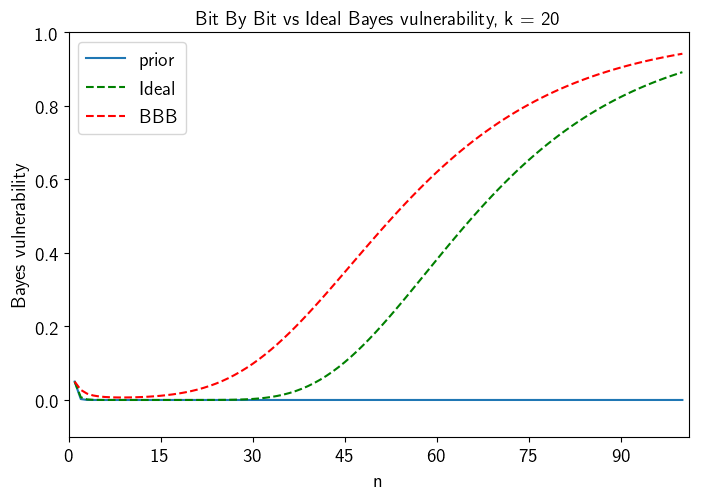

In [53]:
graph_it_vs(n_range, k, df20n100vs)

In [39]:
def graph_it_bayes(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'posterior',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="posterior")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 0, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('Bit By Bit Bayes vulnerability, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

In [42]:
n_range = 25
k = 20
df_20BBBbayes = df_uni_ore_bbb_bayes(n_range, k, M20)
df_20BBBbayes

,n,prior,posterior
0,1,5.0000000000e-02,0.0500000000000000
1,2,2.5000000000e-03,0.0275000000000000
2,3,1.2500000000e-04,0.0173750000000000
3,4,6.2500000000e-06,0.0122937500000000
4,5,3.1250000000e-07,0.00955343750000000
5,6,1.5625000000e-08,0.00803360937500000
6,7,7.8125000000e-10,0.00721576484375000
7,8,3.9062500000e-11,0.00684438933593750
8,9,1.9531250000e-12,0.00678974455273438
9,10,9.7656250000e-14,0.00698749906162109


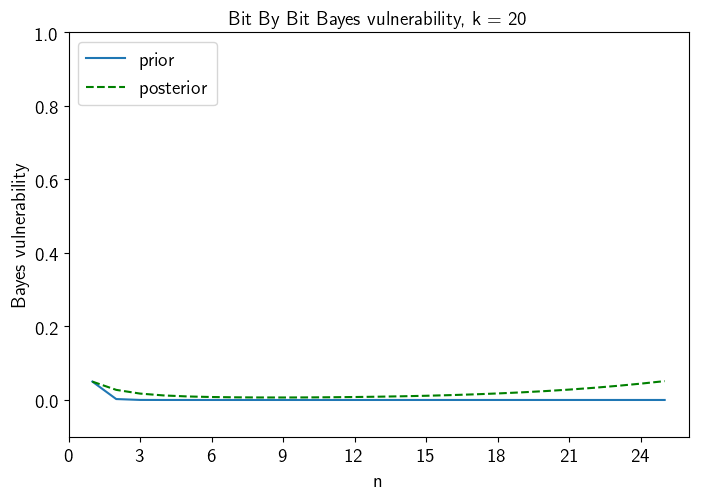

In [43]:
graph_it_bayes(n_range, k, df_20BBBbayes)

## For Presentation
Comparing Ideal ORE and BbB ORE

In [ ]:
p = {'k': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'BbBn4': [0.8024691358024691, 0.48828125, 0.4144, 0.2646604938271605, 0.18783840066638902, 0.115966796875, 0.11294010059442158, 0.0849, 0.06700361997131343, 0.04846643518518518, 0.04064983719057456, 0.03084652228238234, 0.023881481481481483, 0.0184478759765625], #k = 15 is confusing
    'BbBn5': [0.8683127572016461, 0.5869140625, 0.48992, 0.30877057613168724, 0.22318081751651098, 0.132781982421875, 0.12448983047977104, 0.08941, 0.06911475246971456, 0.04762651105967078, 0.040078859552967604, 0.029230752067590886, 0.021966748971193415, 0.016023635864257812],
    'Idealn4': [0.629629629629630, 0.292968750000000, 0.120000000000000, 0.0578703703703704, 0.0312369845897543, 0.0183105468750000, 0.0114311842706904, 0.00750000000000000, 0.00512260091523803, 0.00361689814814815, 0.00262595847484332, 0.00195231153685964, 0.00148148148148148, 0.00114440917968750],
    'Idealn5': [0.744855967078189, 0.411132812500000, 0.173120000000000, 0.0695730452674897, 0.0321889688820134, 0.0165100097656250, 0.00916188250436078, 0.00541000000000000, 0.00335918435775003, 0.00217415766460905, 0.00145707029219511, 0.00100590527756292, 0.000712427983539095, 0.000515937805175781],
    'Prior4': [0.012345679012345678, 0.00390625, 0.0016, 0.0007716049382716049, 0.00041649312786339027, 0.000244140625, 0.00015241579027587258, 0.0001, 6.830134553650706e-05, 4.8225308641975306e-05, 3.501277966457757e-05, 2.6030820491461892e-05, 1.9753086419753087e-05, 1.52587890625e-05],
    'Prior5': [0.00411522633744856, 0.0009765625, 0.00032, 0.0001286008230452675, 5.9499018266198606e-05, 3.0517578125e-05, 1.6935087808430286e-05, 1e-05, 6.209213230591551e-06, 4.018775720164609e-06, 2.693290743429044e-06, 1.8593443208187064e-06, 1.3168724279835392e-06, 9.5367431640625e-07]
    }
df = pd.DataFrame(data = p)

In [ ]:
plt.figure(figsize=(8, 5.25))
plt.plot('k', 'BbBn4', data = df, label="BbB n = 4")
plt.plot('k', 'BbBn5', data = df, label="BbB n = 5")
plt.plot('k', 'Idealn4', data = df, label="Ideal n = 4")
plt.plot('k', 'Idealn5', data = df, label="Ideal n = 5")
#plt.plot('k', 'Prior4', data = df, label="Prior n = 4")
#plt.plot('k', 'Prior5', data = df, label="Prior n = 5")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Posterior Bayes Vulnerability')
plt.ylim(bottom=-.1, top = 1)
plt.title('Bayes vulnerability where n = 4 and 5 under Ideal and Bit By Bit ORE')
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(8, 5.25))
plt.plot('k', 'BbBn4', data = df, label="BbB n = 4")
plt.plot('k', 'BbBn5', data = df, label="BbB n = 5")
plt.plot('k', 'Idealn4', data = df, label="Ideal n = 4")
plt.plot('k', 'Idealn5', data = df, label="Ideal n = 5")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Posterior Bayes Vulnerability')
plt.ylim(bottom=-.00000001, top = 0.08)
plt.xlim(left = 11, right = 16)
plt.title('Bayes vulnerability where n = 4 and 5 under Ideal and Bit By Bit ORE')
plt.show()
plt.close()

In [ ]:
k_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
topn5 = [211, 601, 1531, 2401, 3751, 4351, 7351, 8941, 11131, 11851, 14881, 15721, 16681, 16802]
BbBn5 = []
n = 5
for k, t in zip(k_list, topn5):
    BbBn5.append(t / math.pow(k,n))
print(BbBn5)

In [ ]:
k_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
prior5 = []
n = 5
for k in k_list:
    prior5.append(1 / math.pow(k, n))
print(prior5)

In [ ]:
d = {'k': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'n4': [65, 125, 259, 343, 451, 475, 741, 849, 981, 1005, 1161, 1185, 1209, 1209], #k = 15 is confusing
    'n5': [211, 601, 1531, 2401, 3751, 4351, 7351, 8941, 11131, 11851, 14881, 15721, 16681, 16802]}
df = pd.DataFrame(data = d)

In [ ]:
df

In [ ]:
plt.plot('k', 'n4', data = df, label='n = 4')
plt.plot('k', 'n5', data = df, label='n = 5')
plt.legend(loc='upper left')
plt.show()
plt.close()

In [ ]:
plt.plot('k', 'n4', data = df, label='n4')
plt.legend(loc='upper left')
plt.show()
plt.close()